### Build a DNN using Keras with `RELU` and `ADAM`

#### Load tensorflow

In [1]:
import tensorflow as tf
tf.reset_default_graph()
tf.set_random_seed(42)

#### Collect Fashion mnist data from tf.keras.datasets 

In [2]:
(trainX, trainY),(testX, testY) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
import numpy as np

In [4]:
#finding the number of unique classes in trainY
len(np.unique(trainY))

10

In [5]:
#2nd way to find the number of unique classes in trainY
indices,u = np.unique(trainY, return_index = True) 
print(indices)
print(u)

[0 1 2 3 4 5 6 7 8 9]
[ 1 16  5  3 19  8 18  6 23  0]


#### Change train and test labels into one-hot vectors

In [6]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

#### Build the Graph

#### Initialize model, reshape & normalize data

In [7]:
#Initialize model, reshape & normalize data
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())

Instructions for updating:
Colocations handled automatically by placer.


#### Add two fully connected layers with 200 and 100 neurons respectively with `relu` activations. Add a dropout layer with `p=0.25`

In [8]:
#Hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu', name='Layer_1'))
model.add(tf.keras.layers.Dense(100, activation='relu', name='Layer_2'))

#Dropout layer
model.add(tf.keras.layers.Dropout(0.25))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


### Add the output layer with a fully connected layer with 10 neurons with `softmax` activation. Use `categorical_crossentropy` loss and `adam` optimizer and train the network. And, report the final validation.

In [9]:
#Output layer
model.add(tf.keras.layers.Dense(10, activation='softmax', name='Output'))

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
# Fit the model

history = model.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=30,
          batch_size=20)



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1653 - acc: 0.9407 - val_loss: 0.5033 - val_acc: 0.8864
Epoch 2/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1546 - acc: 0.9445 - val_loss: 0.4832 - val_acc: 0.8866
Epoch 3/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1568 - acc: 0.9432 - val_loss: 0.5278 - val_acc: 0.8864
Epoch 4/30
60000/60000 [==============================] - 8s 130us/sample - loss: 0.1514 - acc: 0.9454 - val_loss: 0.5486 - val_acc: 0.8857
Epoch 5/30
60000/60000 [==============================] - 8s 133us/sample - loss: 0.1544 - acc: 0.9433 - val_loss: 0.5255 - val_acc: 0.8876
Epoch 6/30
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1531 - acc: 0.9445 - val_loss: 0.5099 - val_acc: 0.8909
Epoch 7/30
60000/60000 [==============================] - 8s 132us/sample - loss: 0.1530 - acc: 0.9443 - val_l

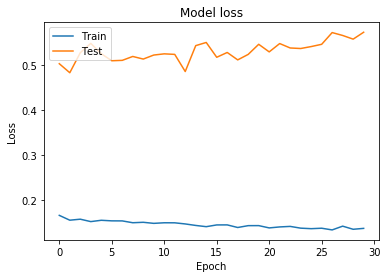

In [18]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

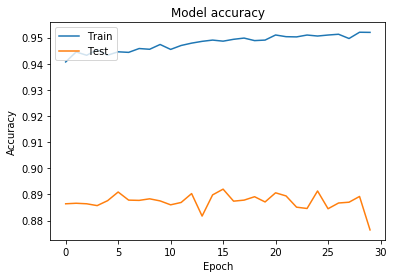

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()